In [27]:
# General Imports
import re
import zipfile 
from tqdm.notebook import tqdm
from emoji import demojize
from typing import Union, List


# Data Analysis and visualizations
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Import Spacy
import spacy
from spacy.lang.en import English
!python -m spacy download en_core_web_md

nlp = spacy.load("en_core_web_md", disable=["parser", "ner"])
# Import NLTK
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))
nltk.download('punkt', quiet=True)
nltk.download('sentiwordnet')
nltk.download('wordnet')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 11.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/jonathan/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jonathan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
# Define the lists of bullish and bearish words
bullish_words = [
    "Ascending", "Booming", "Thriving", "Soaring", "Advancing", "Gaining", 
    "Surging", "Flourishing", "Rallying", "Climbing", "Improving", "Appreciating", 
    "Strengthening", "Outperforming", "Prosperous", "Bull Run", "Upturn", "Upswing", 
    "Breakout", "Bullish Trend", "Recovery", "Rebound", "Growth", "Expansion", 
    "Profitable", "Lucrative", "Positive Momentum", "Accelerating", "Bull Market", 
    "Rising", "Increasing", "Gains", "Optimistic", "Confidence", "Momentum", 
    "Upbeat", "Elevating", "Boon", "Spike", "Upward", "Fortunate", "Favorable", 
    "Advancement", "Success", "Prosperity", "Enhancement", "Peak", "Highs", "Triumph", 
    "Victory", "hodl", "HODL", "Diamond", "Moon", "Rocket", "long", "calm", "Surpassing" , 
    "Exceeding" , "Rally" , "Upsurge" , "Breakthrough" , "Elevate" , "Skyrocketing" , 
    "Booster" , "Enhancing" , "Progressive" , "Advancing" , "Thruster" , "Accelerate" , 
    "Uptrend" , "Prospering" , "Escalating" , "Leap" , "Surge" , "Outpacing" , "Recovering"
]

bearish_words = [
    "Declining", "Falling", "Dropping", "Plunging", "Tumbling", "Decreasing", 
    "Slumping", "Deteriorating", "Retreating", "Correcting", "Depreciating", 
    "Weakening", "Downward", "Bear Market", "Losses", "Downturn", "Downswing", 
    "Retreat", "Bearish Trend", "Contraction", "Sell-off", "Correction", "Recession", 
    "Pullback", "Decline", "Downgrade", "Underperforming", "Bleak", "Descent", 
    "Negative Momentum", "Stagnation", "Volatility", "Risk", "Depress", "Erosion", 
    "Collapse", "Crisis", "Downside", "Pessimism", "Uncertainty", "Worry", "Bear Run", 
    "Underwhelming", "Reversal", "Slippage", "Falter", "Downtrend", "Bearish Outlook", 
    "Bottoming", "Lows", "Paper", "blow", "Plummeted", "Drown", "Warning", "short", "panic",
    "plunge", "losing", "Decline" , "Devalue" , "Regress" , "Deflate" , "Subside" , "Dwindle" ,
    "Backslide" , "Recede" , "Contracting" , "Diminish" , "Wane" , "Slide" , "Degenerate" , 
    "Retract" , "Reverse" , "Undercut" , "Undermine" , "Weaken" , "Degrade" , "Depreciate"
]

In [42]:

def analyze_sentiment(sentence):
    # Tokenize the sentence
    words = word_tokenize(sentence.lower())
    
    # Count bullish and bearish words
    bullish_count = sum(word in bullish_words for word in words)
    bearish_count = sum(word in bearish_words for word in words)
    
    # Determine sentiment
    if bullish_count > bearish_count:
        return "Bullish"
    elif bearish_count > bullish_count:
        return "Bearish"
    else:
        return "Neutral"

# Example sentence
sentence = "The market is plunge."
print(analyze_sentiment(sentence))


Bearish


In [30]:
# verify working directory of the notebook 
import os 
print(os.getcwd())

/Users/jonathan/Documents/Obsidian Vault/HEC/Session 4 Winter 2024/Machine Learning I/Project/WallstreetbetsGenNLP/tests/jonathan


In [31]:
# Extract the zip files

# Specify the path to the zip file
zip_file_path = '../../data_raw/reddit_wsb.csv.zip'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('data_raw')

# Read the CSV using Pandas
csv_file_path = 'data_raw/reddit_wsb.csv'
df = pd.read_csv(csv_file_path)


In [32]:
display(df.head(20)) 

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
5,WE BREAKING THROUGH,405,l6uf7d,https://i.redd.it/2wef8tc062e61.png,84,1.611862e+09,NaN,2021-01-28 21:26:30
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31
8,Currently Holding AMC and NOK - Is it retarded...,200,l6ub4i,https://i.redd.it/6k2z7ouo42e61.png,161,1.611862e+09,NaN,2021-01-28 21:19:16
9,I have nothing to say but BRUH I am speechless...,291,l6uas9,https://i.redd.it/bfzzw2yo42e61.jpg,27,1.611862e+09,NaN,2021-01-28 21:18:37


In [33]:
def preprocess_text(texts: Union[str, List[str], pd.Series], clean_emojis: bool = False) -> Union[str, List[str]]:
    cleaned_texts = []

    # Processing texts using Spacy pipeline
    for doc in tqdm(nlp.pipe(texts, batch_size=20), total=len(texts), desc="Cleaning Texts"):

        # Handle emojis: translate to text if not removing, else remove
        if clean_emojis:
            doc = re.sub(r':[^:]+:', '', demojize(doc.text))  # Remove emojis
        else:
            doc = demojize(doc.text)  # Convert emojis to text

        # Tokenization and preprocessing
        tokens = [token.text.lower() for token in nlp(doc) if token.text.isalpha()]

        # Removing stopwords and short tokens
        tokens = [token for token in tokens if token not in stop_words and len(token) > 1]

        cleaned_texts.append(' '.join(tokens))  # Rejoin tokens into a string

    return cleaned_texts


In [34]:
# Fill all the NaN values in the body column with an empty string
df['body'] = df['body'].fillna('')

# Combine the title and bodyy into a single column text, separated by two newlines
df['text'] = df['title'] + '\n\n' + df['body']

# drop the body column 
df = df.drop(columns=['body'])

# Preview the loaded data 
display(df.head(10))

,title,score,id,url,comms_num,created,timestamp,text
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,2021-01-28 21:37:41,"It's not about the money, it's about sending a..."
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,2021-01-28 21:32:10,Math Professor Scott Steiner says the numbers ...
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,2021-01-28 21:30:35,Exit the system\n\nThe CEO of NASDAQ pushed to...
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,2021-01-28 21:28:57,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,2021-01-28 21:26:56,"Not to distract from GME, just thought our AMC..."
5,WE BREAKING THROUGH,405,l6uf7d,https://i.redd.it/2wef8tc062e61.png,84,1.611862e+09,2021-01-28 21:26:30,WE BREAKING THROUGH\n\n
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,2021-01-28 21:26:27,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE\n\...
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,2021-01-28 21:19:31,THIS IS THE MOMENT\n\nLife isn't fair. My moth...
8,Currently Holding AMC and NOK - Is it retarded...,200,l6ub4i,https://i.redd.it/6k2z7ouo42e61.png,161,1.611862e+09,2021-01-28 21:19:16,Currently Holding AMC and NOK - Is it retarded...
9,I have nothing to say but BRUH I am speechless...,291,l6uas9,https://i.redd.it/bfzzw2yo42e61.jpg,27,1.611862e+09,2021-01-28 21:18:37,I have nothing to say but BRUH I am speechless...


In [50]:
texts = pd.DataFrame(df['text'])
#texts = pd.DataFrame({'text': df['title'].astype(str) + " " + df['text'].astype(str)})

In [51]:
texts

,text
0,"It's not about the money, it's about sending a..."
1,Math Professor Scott Steiner says the numbers ...
2,Exit the system Exit the system\n\nThe CEO of ...
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...
4,"Not to distract from GME, just thought our AMC..."
...,...
53182,What I Learned Investigating SAVA FUD Spreader...
53183,"Daily Popular Tickers Thread for August 02, 20..."
53184,Hitler reacts to the market being irrational H...
53185,"Daily Discussion Thread for August 02, 2021 Da..."


In [52]:
# Preprocess each title and track progress with tqdm
texts['processed_text'] = preprocess_text(texts['text'], clean_emojis=True)

Cleaning Texts:   0%|          | 0/53187 [00:00<?, ?it/s]

In [53]:
texts['trend'] = texts['processed_text'].apply(analyze_sentiment)


<Axes: >

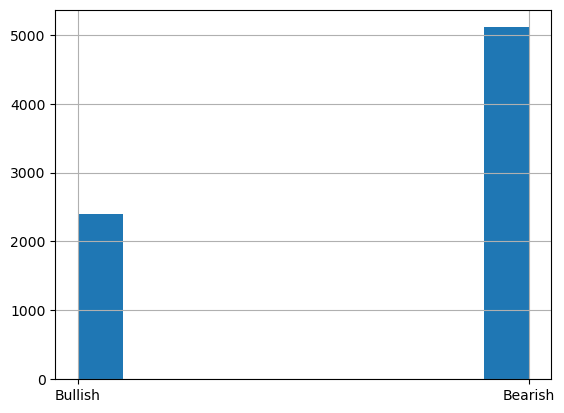

In [61]:
#texts['trend'].hist()
bullbear = texts[texts['trend'] != 'Neutral']
bullbear['trend'].hist()
